In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.20/04


In [2]:
##### setting file path #####

sig_rootpath = "/data/Chen-Wang/gghh_highPT_250/Events/run_01_decayed_1/tag_1_delphes_events.root"
sig_file = uproot.open(sig_rootpath)

In [17]:
sig_Fjet_Eta = sig_file["Delphes;1"]["FatJet.Eta"].array()
sig_Fjet_Phi = sig_file["Delphes;1"]["FatJet.Phi"].array()
sig_Fjet_Particles = sig_file["Delphes;1"]["FatJet.Particles"].array()
sig_Fjet_Mass = sig_file["Delphes;1"]["FatJet.NSubJetsPruned"].array()

event_num = 23

print(sig_Fjet_Eta[event_num])
print(sig_Fjet_Phi[event_num])

print(sig_Fjet_Particles[event_num])
print(sig_Fjet_Mass[event_num])

[-0.48722512  0.3971993 ]
[ 2.0465853  -0.55233836]
[[2185, 1429, 1690, 1928, 2025, 2022, 1360, 1207, 1155, 2357, 1155, 2115, 2351, 2391, 2393, 1620, 2356, 2392, 2394, 1503, 1616, 1143, 1325, 1693, 2113, 1812, 1153, 2235, 2234, 1107, 2350, 1841, 1108, 2381, 2384, 1839, 2386, 2382, 2385, 1107, 2232, 2383], [1144, 1657, 1976, 2120, 1626, 1334, 1165, 1931, 1621, 2253, 2377, 2362, 2361, 2251, 2378, 2358, 2250, 1868, 2211, 1483, 2003, 2175, 2176, 1998, 1997, 2173, 1481, 1486, 1484, 1764, 1896, 2171, 2172, 1481, 1762, 1999, 2174, 1996]]
[2 2]


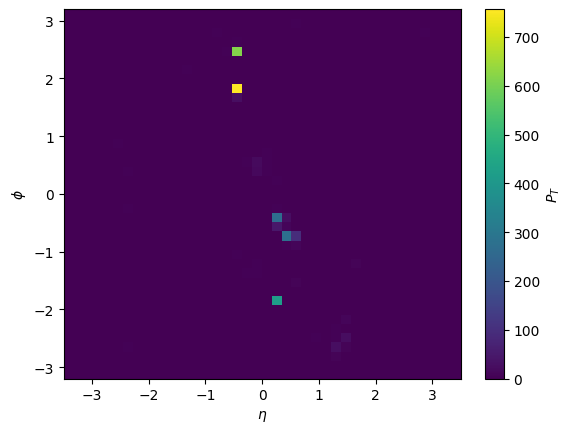

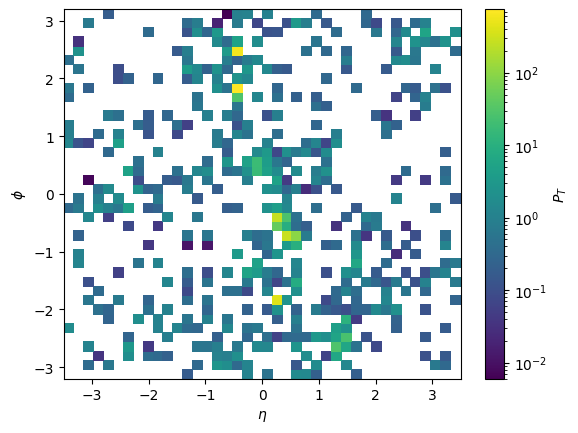

In [4]:
##### set signal event content #####

event_num = 23
grid_num = 40    # means n^2 points
events = [sig_file["Delphes;1"]["Particle.Status"].array()[event_num],
        sig_file["Delphes;1"]["Particle.PT"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Eta"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Phi"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Mass"].array()[event_num],
        ]

situation = 1*(events[0]==1)+1*(events[0]==2)
where_finalstate = np.where(situation==1)

#print(where_finalstate)
final_Eta = events[2][where_finalstate]
final_Phi = events[3][where_finalstate]
final_PT = events[1][where_finalstate]

'''
final_Eta = np.append(final_Eta, 3)
final_Phi = np.append(final_Phi, -2)
final_PT = np.append(final_PT, 3000)
'''

##### Draw the final state PT figure #####

xedges = np.linspace(-3.5, 3.5, grid_num+1)        # Eta limit
yedges = np.linspace(-3.2, 3.2, grid_num+1)    # Phi limit
PT = np.zeros([grid_num,grid_num])

for Eta in range(grid_num):
    for Phi in range(grid_num):
        where1 = np.where((xedges[Eta]<final_Eta) & (final_Eta<xedges[Eta+1]) & (yedges[Phi]<final_Phi) & (final_Phi<yedges[Phi+1]))
        PT[Eta][Phi] = sum(final_PT[where1])

pcm = plt.pcolormesh(xedges, yedges, PT.T)
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()      

pcm = plt.pcolormesh(xedges, yedges, PT.T, norm=LogNorm())
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

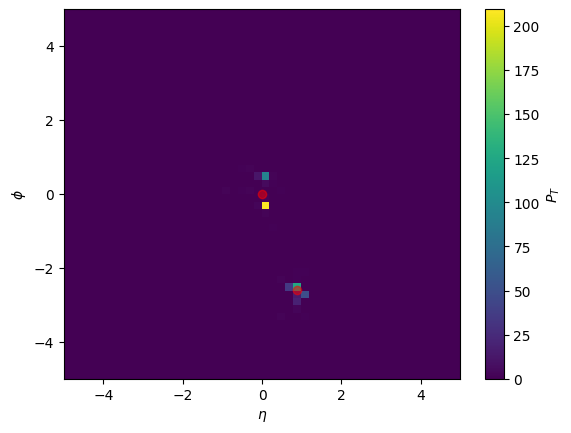

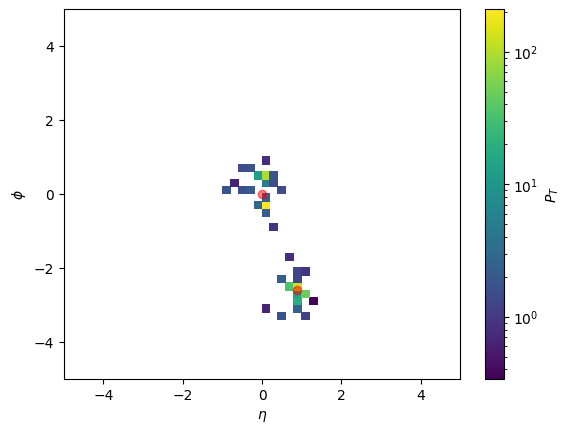

Fat jet momentum [332.1581  266.31076]


In [5]:
##### include data #####

event_num = 23
grid_num = 50    # means n^2 points
events = [sig_file["Delphes;1"]["Particle.Status"].array(),
        sig_file["Delphes;1"]["Particle.PT"].array(),
        sig_file["Delphes;1"]["Particle.Eta"].array(),
        sig_file["Delphes;1"]["Particle.Phi"].array(),
        sig_file["Delphes;1"]["FatJet.Particles"].array(),
        sig_file["Delphes;1"]["FatJet.Eta"].array(),
        sig_file["Delphes;1"]["FatJet.Phi"].array(),
        sig_file["Delphes;1"]["FatJet.PT"].array(),
        sig_file["Delphes;1"]["FatJet"].array()
        ]

##### reshape the signal data #####

events = np.expand_dims(events, axis=-1)
events = events.transpose((1,0,2))
events = np.squeeze(events,axis=(2,))

##### find jet particles #####

where_jet_particle = events[event_num][4][0]+events[event_num][4][1]
where_jet_particle = np.array(where_jet_particle)-1
particle_Eta = events[event_num][2][where_jet_particle] - events[event_num][5][0]
particle_Phi = events[event_num][3][where_jet_particle] - events[event_num][6][0]
particle_PT = events[event_num][1][where_jet_particle]

##### Draw the jet PT figure #####

xedges = np.linspace(-5, 5, grid_num+1)        # Eta limit
yedges = np.linspace(-5, 5, grid_num+1)    # Phi limit
PT = np.zeros([grid_num,grid_num])

for Eta in range(grid_num):
    for Phi in range(grid_num):
        where1 = np.where((xedges[Eta]<particle_Eta) & (particle_Eta<xedges[Eta+1]) & (yedges[Phi]<particle_Phi) & (particle_Phi<yedges[Phi+1]))
        PT[Eta][Phi] = sum(particle_PT[where1])

pcm = plt.pcolormesh(xedges, yedges, PT.T)
plt.scatter(events[event_num][5]-events[event_num][5][0], events[event_num][6]-events[event_num][6][0], c='r', alpha=0.5)
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

pcm = plt.pcolormesh(xedges, yedges, PT.T, norm=LogNorm())
plt.scatter(events[event_num][5]-events[event_num][5][0], events[event_num][6]-events[event_num][6][0], c='r', alpha=0.5)
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

print("Fat jet momentum", events[event_num][7])

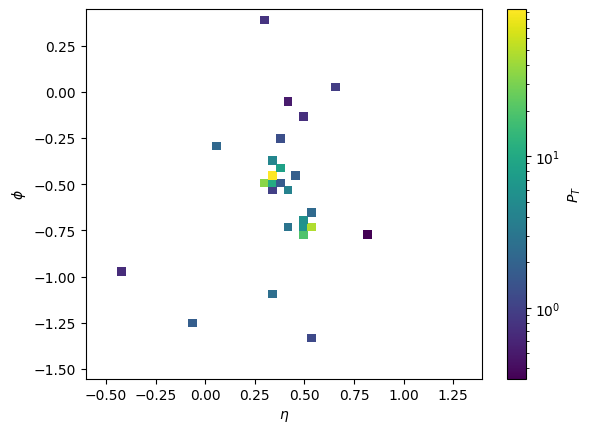

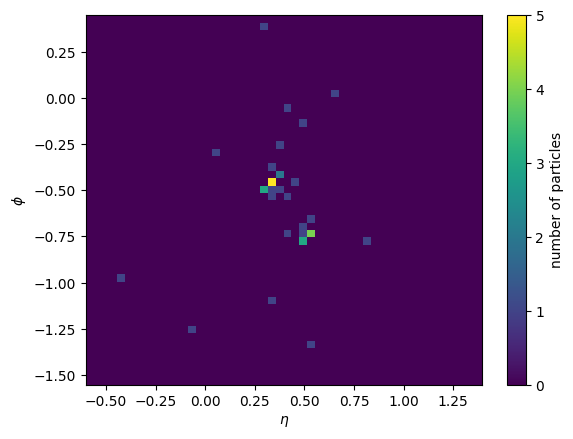

In [21]:
##### include data #####
event_num = 23
grid_num = 50    # means n^2 points

jet_events = [sig_file["Delphes;1"]["Particle.Status"].array(),
        sig_file["Delphes;1"]["Particle.PT"].array(),
        sig_file["Delphes;1"]["Particle.Eta"].array(),
        sig_file["Delphes;1"]["Particle.Phi"].array(),
        sig_file["Delphes;1"]["FatJet.Particles"].array(),
        sig_file["Delphes;1"]["FatJet.Eta"].array(),
        sig_file["Delphes;1"]["FatJet.Phi"].array(),
        sig_file["Delphes;1"]["FatJet.PT"].array(),
        sig_file["Delphes;1"]["FatJet"].array()
        ]

##### reshape the signal data #####

jet_events = np.expand_dims(jet_events, axis=-1)
jet_events = jet_events.transpose((1,0,2))
jet_events = np.squeeze(jet_events,axis=(2,))

##### find jet particles #####

#where_jet_particle = jet_events[event_num][4][0]
where_jet_particle = jet_events[event_num][4][1]
where_jet_particle = np.array(where_jet_particle)-1
particle_Eta = jet_events[event_num][2][where_jet_particle]
particle_Phi = jet_events[event_num][3][where_jet_particle]
particle_PT = jet_events[event_num][1][where_jet_particle]

##### Draw the jet PT figure #####

xedges = np.linspace(jet_events[event_num][5][1]-1, jet_events[event_num][5][1]+1, grid_num+1)        # Eta limit
yedges = np.linspace(jet_events[event_num][6][1]-1, jet_events[event_num][6][1]+1, grid_num+1)    # Phi limit
PT = np.zeros([grid_num,grid_num])
num = np.zeros([grid_num,grid_num])

for Eta in range(grid_num):
    for Phi in range(grid_num):
        where1 = np.where((xedges[Eta]<particle_Eta) & (particle_Eta<xedges[Eta+1]) & (yedges[Phi]<particle_Phi) & (particle_Phi<yedges[Phi+1]))
        PT[Eta][Phi] = sum(particle_PT[where1])
        num[Eta][Phi] = len(particle_PT[where1])

        
pcm = plt.pcolormesh(xedges, yedges, PT.T, norm=LogNorm())
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

pcm = plt.pcolormesh(xedges, yedges, num.T)
plt.colorbar(pcm, label='number of particles')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.show()

In [33]:
np.sort(PT.flatten())[::-1]

array([93.56385654, 47.52631191, 34.67758369, ...,  0.        ,
        0.        ,  0.        ])

In [7]:
##### select if Fat Jet>=2 #####

def Fat_Jet_selection(events):
    where1 = np.where(events[:,8]>=2)
    return events[where1]

##### define figure generator #####

def PT_generator(event):
    grid_num = 50    # means n^2 points
    where_jet_particle = event[4][0]+event[4][1]
    where_jet_particle = np.array(where_jet_particle)-1
    particle_Eta = event[2][where_jet_particle] - event[5][0]
    particle_Phi = event[3][where_jet_particle] - event[6][0]
    particle_PT = event[1][where_jet_particle]
    
    xedges = np.linspace(-5, 5, grid_num+1)        # Eta limit
    yedges = np.linspace(-5, 5, grid_num+1)    # Phi limit
    PT = np.zeros([grid_num,grid_num])
    
    for Eta in range(grid_num):
        for Phi in range(grid_num):
            where1 = np.where((xedges[Eta]<particle_Eta) & (particle_Eta<xedges[Eta+1]) & (yedges[Phi]<particle_Phi) & (particle_Phi<yedges[Phi+1]))
            PT[Eta][Phi] = sum(particle_PT[where1])
            
    return PT.T    ### after transpose: X=eta Y=phi

There are 8670 signal events survive with originally 10000 events.


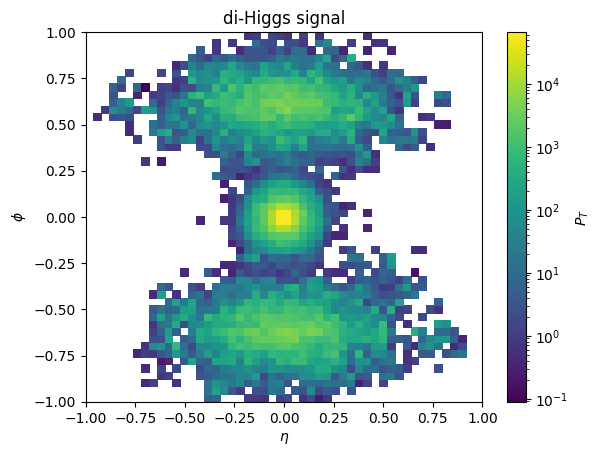

In [8]:
##### select only fat jet >=2 #####

events = Fat_Jet_selection(events)
print("There are", len(events), "signal events survive with originally 10000 events.")

PT_figure_total = np.zeros([grid_num,grid_num])
for i in range(1000):
    PT_figure_total = PT_figure_total + PT_generator(events[i])

pcm = plt.pcolormesh(xedges, yedges, PT_figure_total, norm=LogNorm())
plt.colorbar(pcm, label='$P_T$')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.title("di-Higgs signal")
plt.show()

In [9]:

##### set signal event content #####

events = [sig_file["Delphes;1"]["Particle.Status"].array(),
        sig_file["Delphes;1"]["Particle.M1"].array(),
        sig_file["Delphes;1"]["Particle.M2"].array(),
        sig_file["Delphes;1"]["Particle.D1"].array(),
        sig_file["Delphes;1"]["Particle.D2"].array(),
        sig_file["Delphes;1"]["Particle.PID"].array(),
        sig_file["Delphes;1"]["Particle.PT"].array(),
        sig_file["Delphes;1"]["Particle.Eta"].array(),
        sig_file["Delphes;1"]["Particle.Phi"].array(),
        sig_file["Delphes;1"]["Particle.Mass"].array()
        ]

##### reshape the signal data #####

events = np.expand_dims(events, axis=-1)
events = events.transpose((1,0,2))
events = np.squeeze(events,axis=(2,))

##### set features #####

_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 
Labels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]

##### Show truth record #####

print("Index", "\t","Status", "\t","M1"
    "\t","M2" ,"\t","D1", "\t","D2", "\t","PID", 
    "\t\t","PT" "\t","Eta", "\t\t","Phi", 
    "\t\t","Mass")

event_num = 23
#for j in range(500):
for j in range(len(events[event_num][0])):
    print(j, "\t", events[event_num][_Status][j],"\t\t",
    events[event_num][_M1][j], "\t", events[event_num][_M2][j],
    "\t", events[event_num][_D1][j], "\t", events[event_num][_D2][j],
    "\t", str(events[event_num][_PID][j]).ljust(12, ' '), "\t", round(events[event_num][_PT][j],1),  "\t",
        str(round(events[event_num][_Eta][j],2)).ljust(12, ' ') , "\t",
        str(round(events[event_num][_Phi][j],3)).ljust(12, ' '), "\t",
        round(events[event_num][_Mass][j],3))


Index 	 Status 	 M1	 M2 	 D1 	 D2 	 PID 		 PT	 Eta 		 Phi 		 Mass
0 	 21 		 5 	 -1 	 3 	 4 	 21           	 0.0 	 999.9        	 0.0          	 0.0
1 	 43 		 5 	 -1 	 15 	 15 	 1            	 174.0 	 0.37         	 -0.434       	 0.33
2 	 21 		 7 	 -1 	 3 	 4 	 21           	 0.0 	 -999.9       	 0.0          	 0.0
3 	 22 		 0 	 2 	 8 	 8 	 25           	 294.1 	 -0.55        	 1.988        	 125.0
4 	 22 		 0 	 2 	 9 	 9 	 25           	 294.1 	 -0.14        	 -1.154       	 125.0
5 	 41 		 10 	 -1 	 0 	 1 	 1            	 0.0 	 999.9        	 -0.322       	 0.0
6 	 43 		 10 	 -1 	 21 	 21 	 21           	 55.7 	 1.21         	 -2.444       	 0.0
7 	 42 		 12 	 -1 	 2 	 2 	 21           	 0.0 	 -999.9       	 2.159        	 0.0
8 	 44 		 3 	 -1 	 13 	 13 	 25           	 350.2 	 -0.47        	 2.121        	 125.0
9 	 44 		 4 	 -1 	 14 	 14 	 25           	 226.8 	 0.34         	 -1.46        	 125.0
10 	 41 		 16 	 -1 	 5 	 6 	 1            	 0.0 	 999.9        	 -2.356       	 0.0
1

In [10]:
sig_file["Delphes;1"].show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged